# Subplots

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


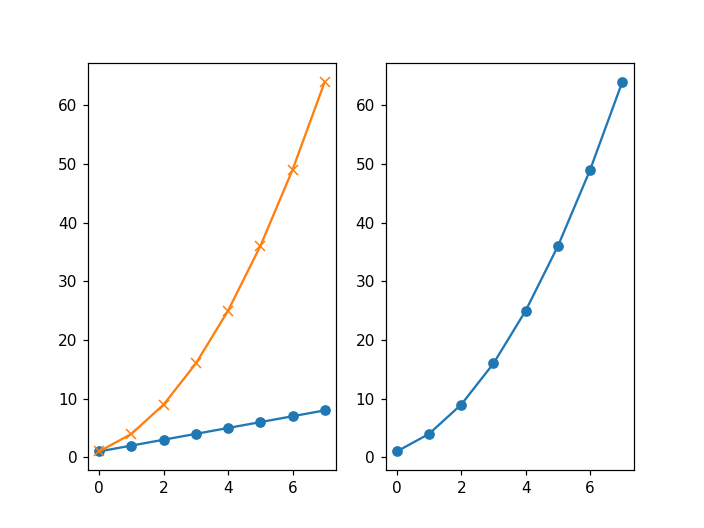

In [3]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [4]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [5]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

C:\Users\saurabh_mahambrey\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


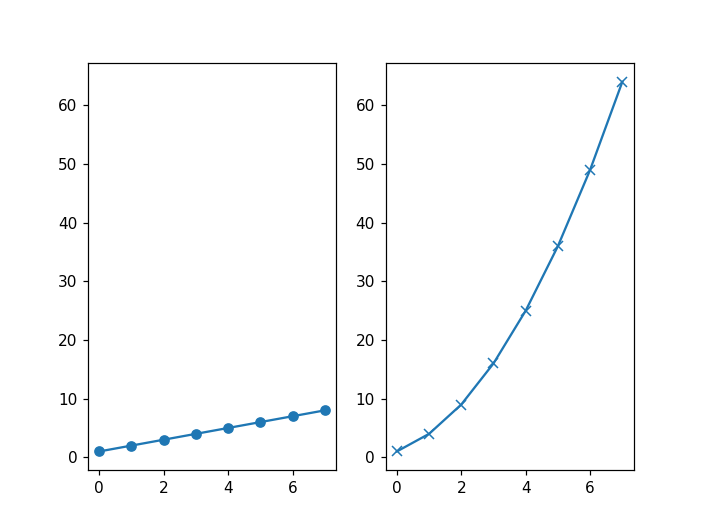

In [6]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


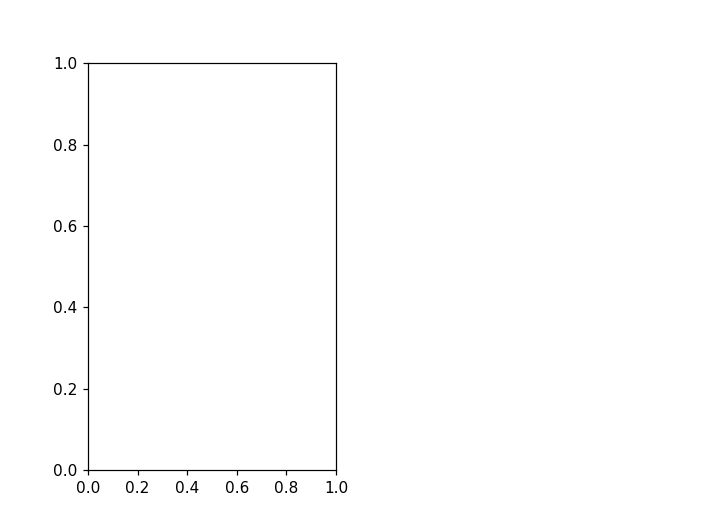

C:\Users\saurabh_mahambrey\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


True

In [7]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


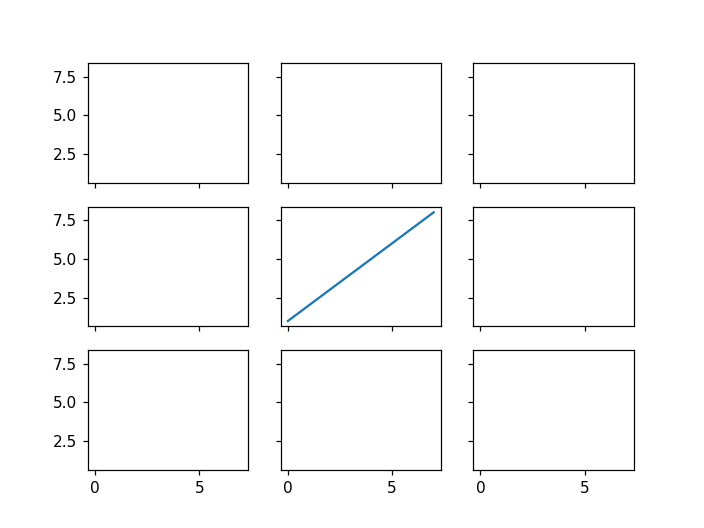

In [8]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [9]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [10]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


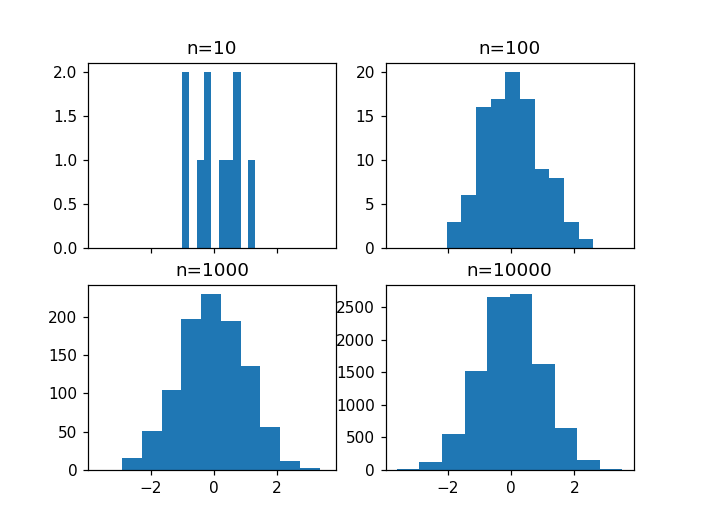

In [11]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


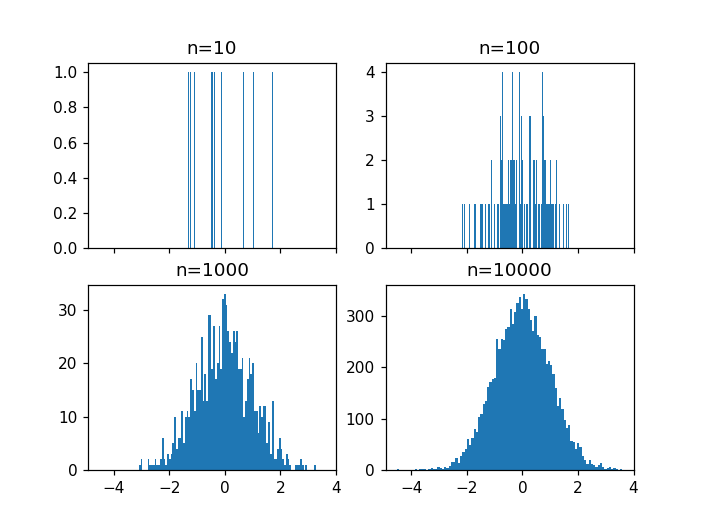

In [12]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


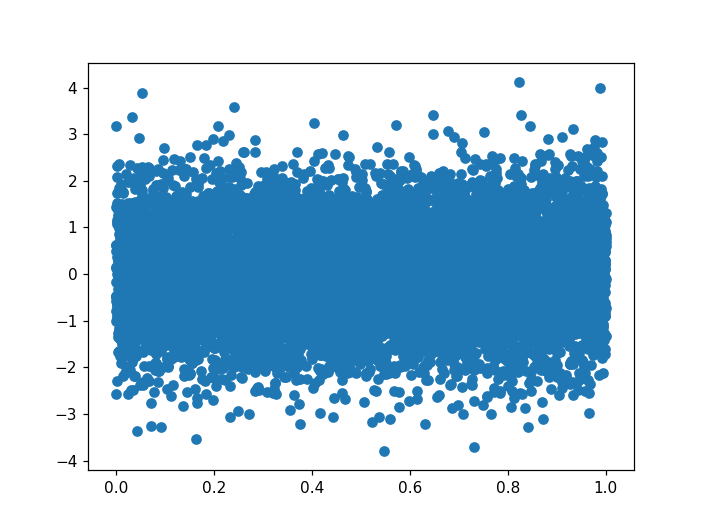

In [13]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


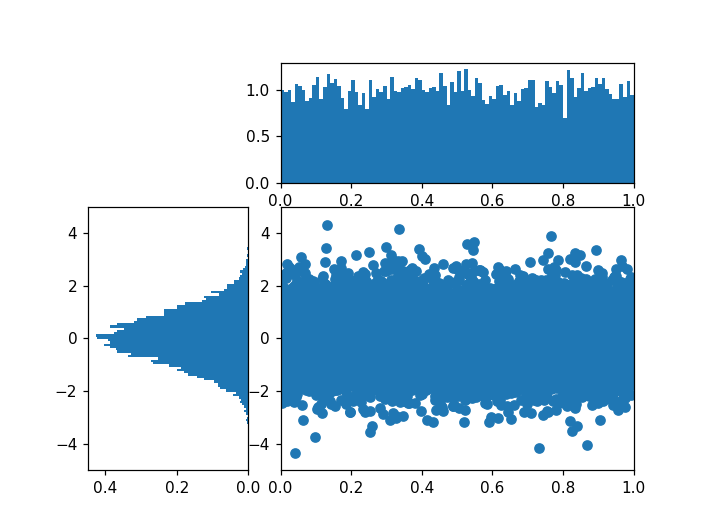

In [14]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [15]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [16]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

C:\Users\saurabh_mahambrey\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [17]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [18]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

In [40]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [41]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.017916,0.498576,1.996613
std,0.997618,0.289045,1.408411
min,-3.523752,0.000057,0.021252
25%,-0.668353,0.248516,0.966065
50%,0.013733,0.498907,1.670120
75%,0.703024,0.750106,2.687078
max,3.665891,0.999755,13.021188


<IPython.core.display.Javascript object>


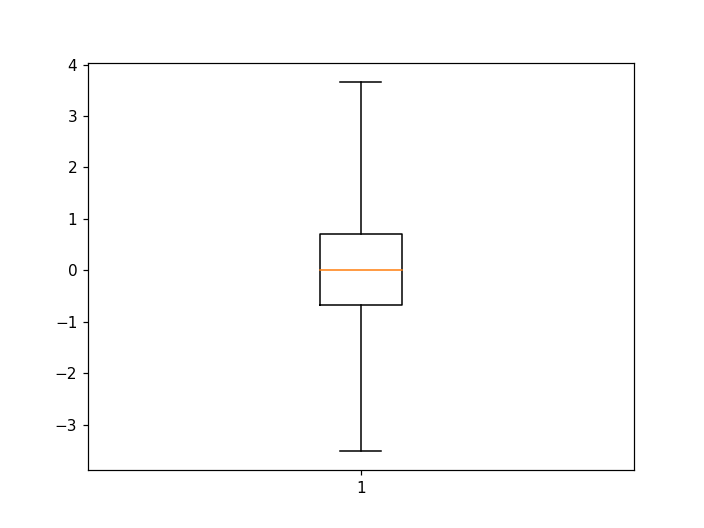

In [42]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [39]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

KeyError: 'normal'

<IPython.core.display.Javascript object>


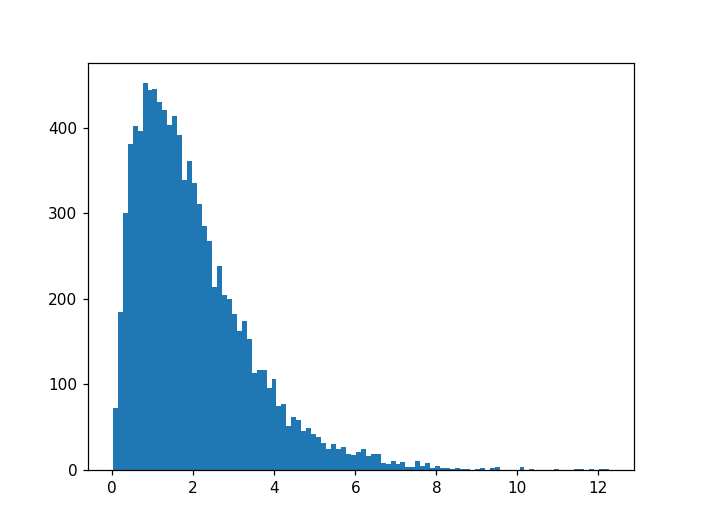

In [23]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


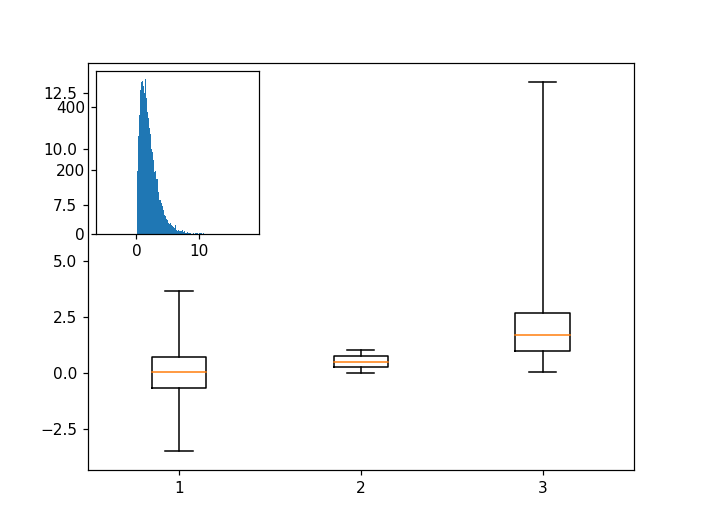

In [54]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range');
# overlay axis on top of another 


In [55]:
ax2 = mpl_il.inset_axes(plt.gca(), width='30%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [25]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


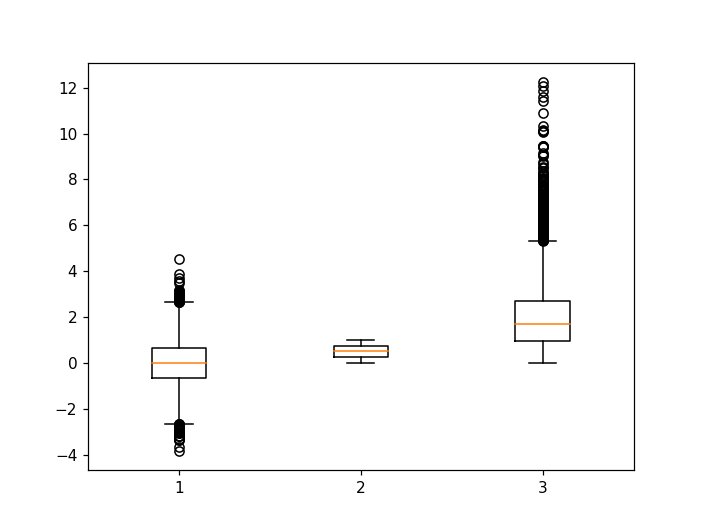

In [26]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


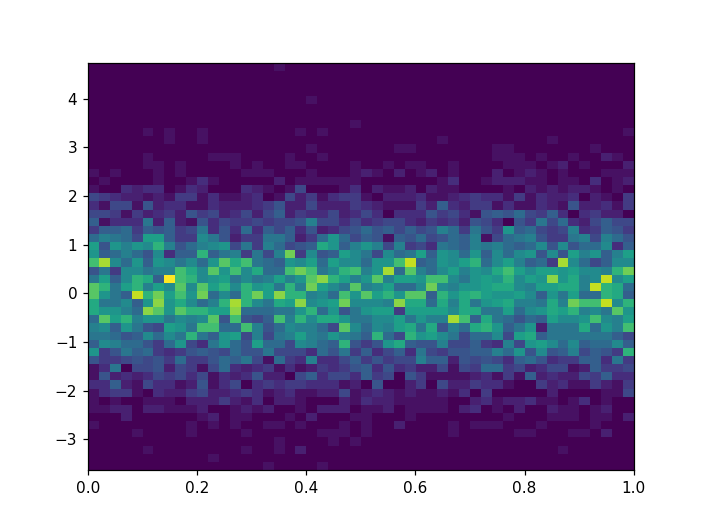

In [63]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=50)

<IPython.core.display.Javascript object>


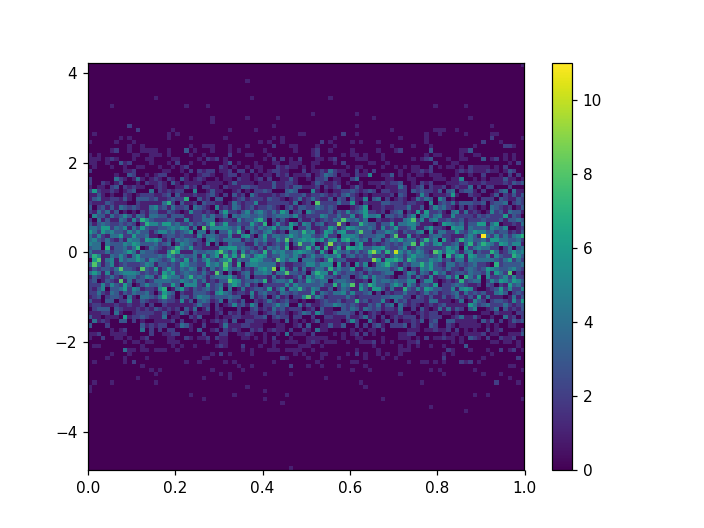

In [28]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [29]:
# add a colorbar legend
plt.colorbar()

# Animations

In [30]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [31]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
#     print(curr)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


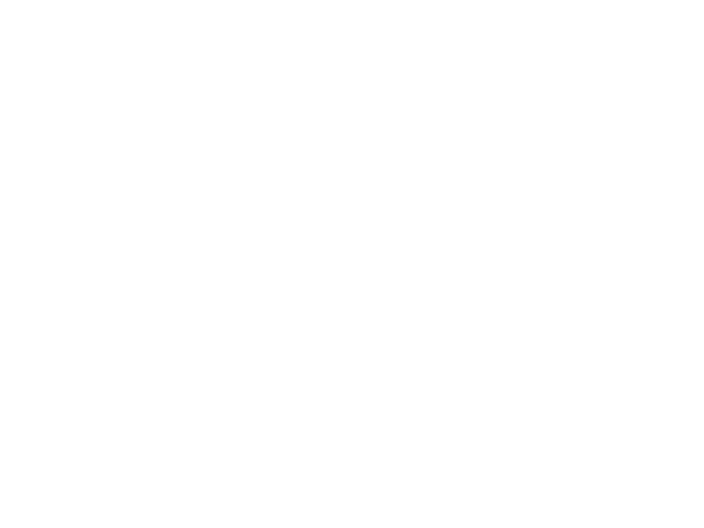

In [32]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=10)

In [33]:
bins = np.arange(-4,4,0.5)
print(bins)
print(x)

[-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5]
[ 8.31234481e-01  8.18253399e-02  2.73017240e-01  1.93841277e-01
 -1.57439186e-01  1.56301004e+00  1.78103299e+00  5.39669360e-01
  4.24495299e-01 -1.80592712e-01 -2.64127352e-01 -5.96540252e-01
  1.69480116e+00 -1.89784906e+00 -9.63649361e-01 -7.69158784e-01
  5.63814219e-01  1.91348476e-01 -5.53520423e-01  5.20510056e-01
 -1.32751571e+00 -1.42138308e+00 -1.85619562e-02 -2.56823653e+00
  1.39740058e+00 -1.75780880e-01  6.06719744e-01 -2.19814948e-01
 -1.86702605e-02 -6.22966820e-01 -9.15086130e-01  5.42008845e-01
  2.26808320e+00  4.32800485e-01 -8.01214959e-01 -1.59883378e+00
 -9.76932784e-01  6.09250840e-01  1.79826059e-01 -2.31053691e-01
 -5.90054298e-01 -6.66694244e-01  2.14792741e-01  1.33956149e+00
  5.83302643e-01 -1.30826955e+00 -6.93138949e-01 -3.00765913e-01
  4.73782277e-01  1.71481388e+00 -2.78004279e-02  6.94249532e-01
  1.16408455e-01  1.65539912e+00 -2.74103823e-01  5.48418341e-01
 -1.421

# Interactivity

<IPython.core.display.Javascript object>


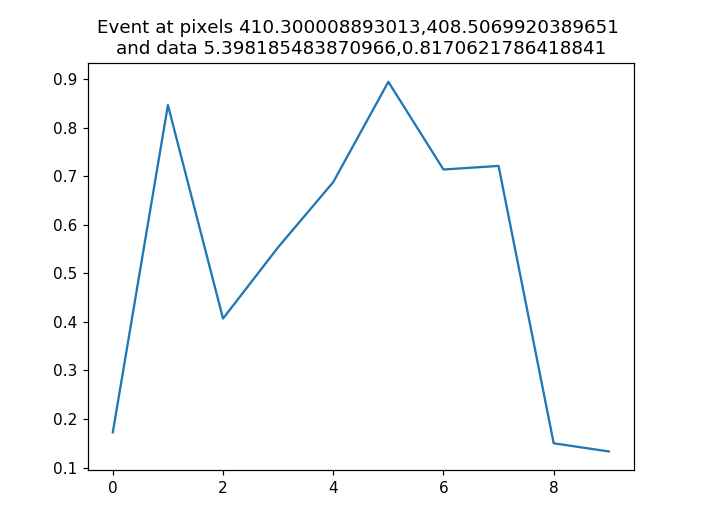

7

In [34]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [35]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.189936,0.482535,UK
1,0.028815,0.653073,Iraq
2,0.494514,0.081022,Chile
3,0.451637,0.500744,Mexico
4,0.408736,0.697947,India
5,0.545263,0.230417,Brazil
6,0.584482,0.070607,Canada
7,0.634029,0.986193,USA
8,0.815826,0.202261,Germany
9,0.821195,0.730183,China


<IPython.core.display.Javascript object>


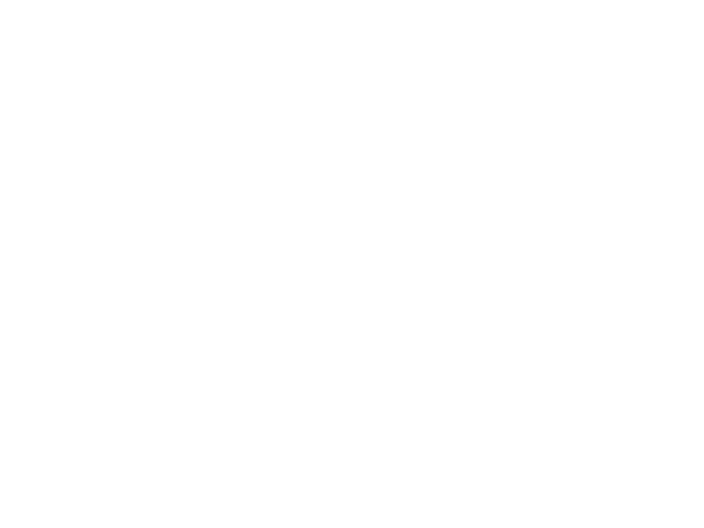

KeyError: 'height'

In [56]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [58]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

8